# Bank data analysis



The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  


The first part of the analysis is visualization and display of data in order to be able to make better statistical and descriptive analysis.

An exploratory data analysis or EDA is often the first thing we do to introduce ourselves to a new dataset. It is performed to make general observations about the data, summarize it, explore some basic trends or uncover hidden relations between variables. Data visualisation can help us to better navigate in the new data and present EDA findings. In this part of project we want to add some value of the dataset that we need to analyze.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
%matplotlib inline

## Read data, visualize, basic statistics, understand it

In [4]:
#read data
data = pd.read_csv('dataset.csv',sep = ';')  
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# data statistics
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

This shows that this is an unbalanced problem.

Next is the analysis of all parameters, in order to determine the variables, whether there is data that is unnecessary and that should be deleted, whether additional data can be obtained from the data for each parameter

In [7]:
#2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur",
#                                   "housemaid","management","retired",
#                                   "self-employed","services","student",
#                                   "technician","unemployed","unknown")

data['job'].value_counts(normalize = True)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

We analyze the data one by one. It can be seen that there are 11 job titles and one unknown. This data can also be deleted because less than 1% of the total data set.

In [8]:
#3 - marital : marital status (categorical: "divorced","married","single",
#                                           "unknown"; note: "divorced" means divorced or widowed)

data["marital"].value_counts(normalize = True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [9]:
#4 - education (categorical: "basic.4y","basic.6y","basic.9y",
#                           "high.school","illiterate","professional.course",
#                           "university.degree","unknown")

data["education"].value_counts(normalize = True)

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [10]:
#5 - default: has credit in default? (categorical: "no","yes","unknown")

data["default"].value_counts(normalize = True)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

In [11]:
#6 - housing: has housing loan? (categorical: "no","yes","unknown")

data["housing"].value_counts(normalize = True)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [12]:
# 7 - loan: has personal loan? (categorical: "no","yes","unknown")

data["loan"].value_counts(normalize = True)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [13]:
#8 - contact: contact communication type (categorical: "cellular","telephone") 

data["contact"].value_counts(normalize = True)

cellular     0.634748
telephone    0.365252
Name: contact, dtype: float64

In [14]:
#9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

data["month"].value_counts(normalize = True)

may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: month, dtype: float64

In [15]:
#10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

data["day_of_week"].value_counts(normalize = True)

thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: day_of_week, dtype: float64

In [16]:
#11 - duration: last contact duration, in seconds (numeric). 
#Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
data["poutcome"].value_counts(normalize=True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

In [17]:
#14 - previous: number of contacts performed before this campaign and for this client (numeric)

data["previous"].value_counts(normalize = True)

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

## Exploratory Data Analysis

to understand the data it is necessary to make a good visualization

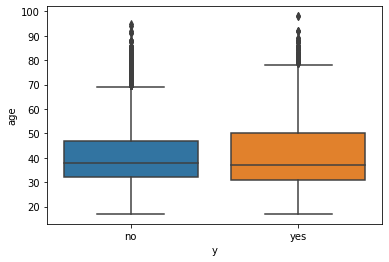

In [18]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

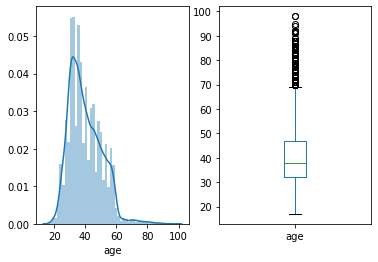

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(data['age'])
plt.subplot(122)
data['age'].plot.box()

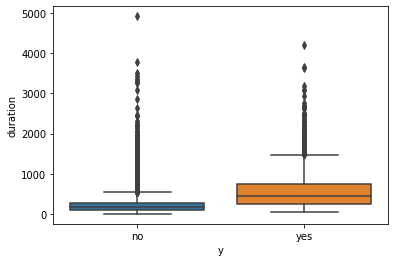

In [20]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

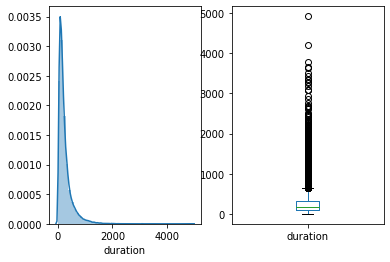

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['duration'])
plt.subplot(122)
data['duration'].plot.box()

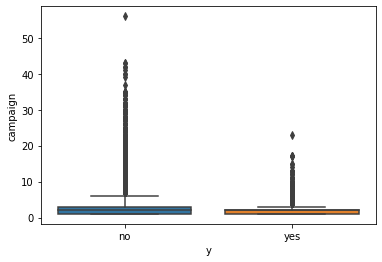

In [22]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

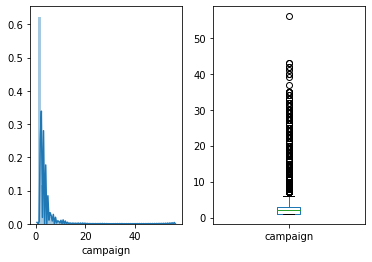

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['campaign'])
plt.subplot(122)
data['campaign'].plot.box()

### Distribution of Class variable

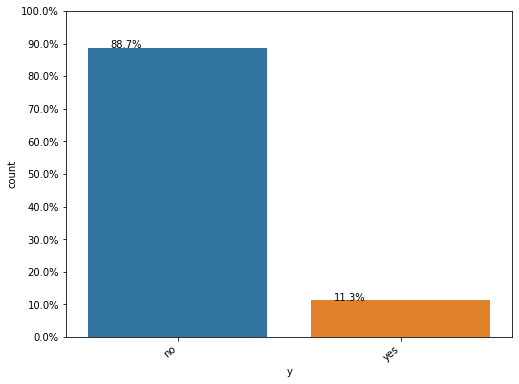

In [24]:
plt.figure(figsize=(8,6))
Y = data['y']
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

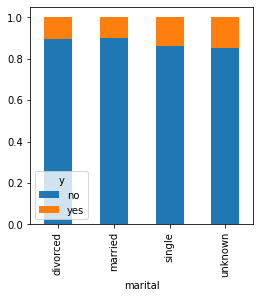

In [25]:
Marriage=pd.crosstab(data["marital"],data['y'])
Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

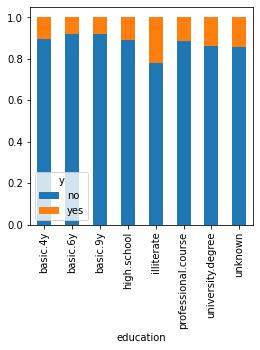

In [26]:
Education=pd.crosstab(data["education"],data['y'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

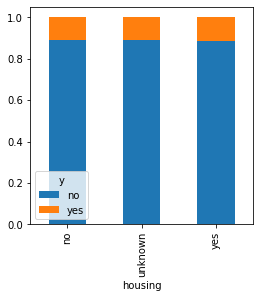

In [27]:
House=pd.crosstab(data["housing"],data['y'])
House.div(House.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

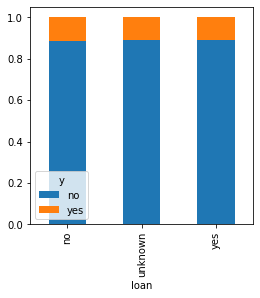

In [28]:
Loan=pd.crosstab(data["loan"],data['y'])
Loan.div(Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

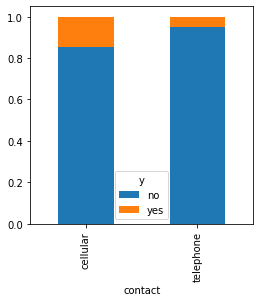

In [29]:
Con=pd.crosstab(data["contact"],data['y'])
Con.div(Con.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

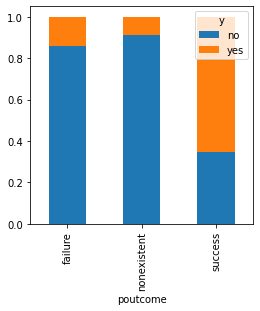

In [30]:
POC=pd.crosstab(data["poutcome"],data['y'])
POC.div(POC.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

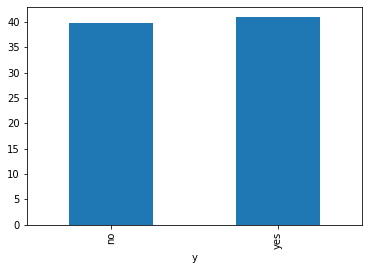

In [31]:
data.groupby('y')['age'].mean().plot.bar()

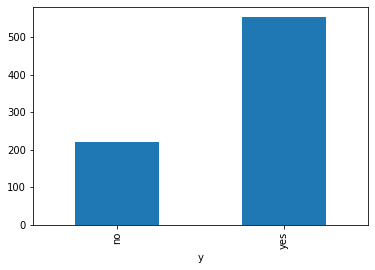

In [32]:
data.groupby('y')['duration'].mean().plot.bar()

### Аdditional functions for better attribute visualization and comparative analysis

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [34]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

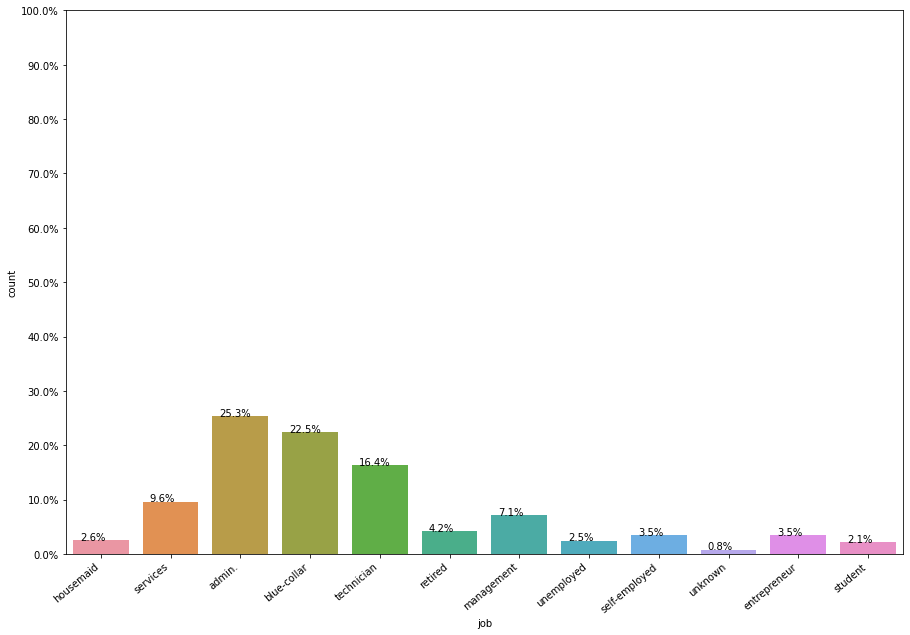

In [35]:
countplot("job", data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

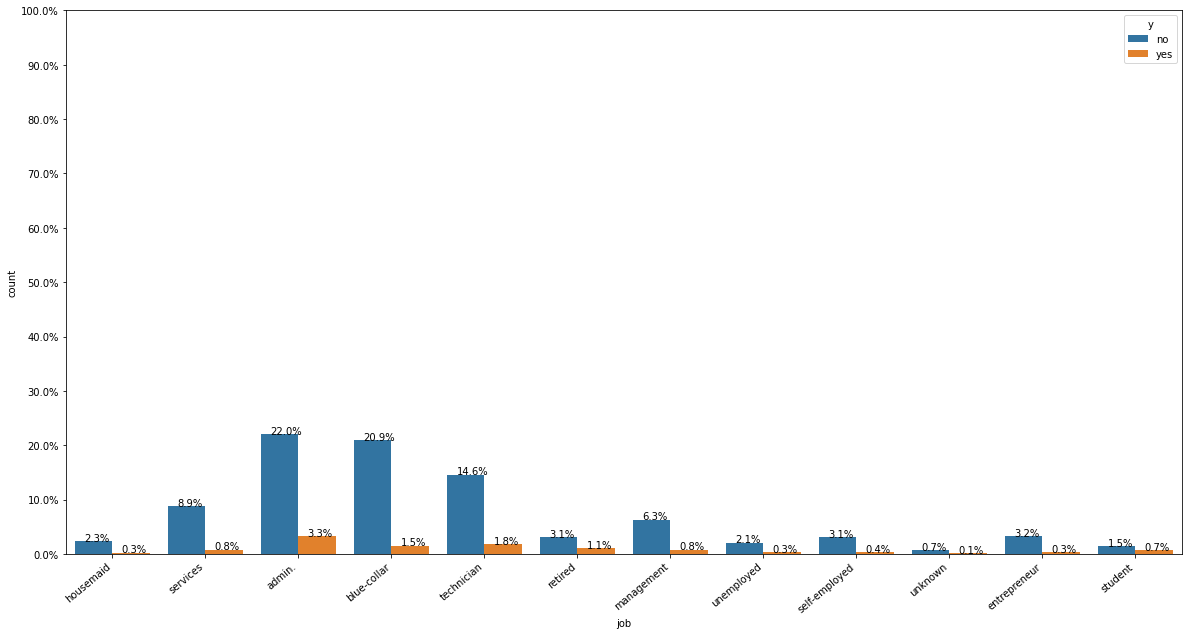

In [36]:
countplot_withY("job", data)

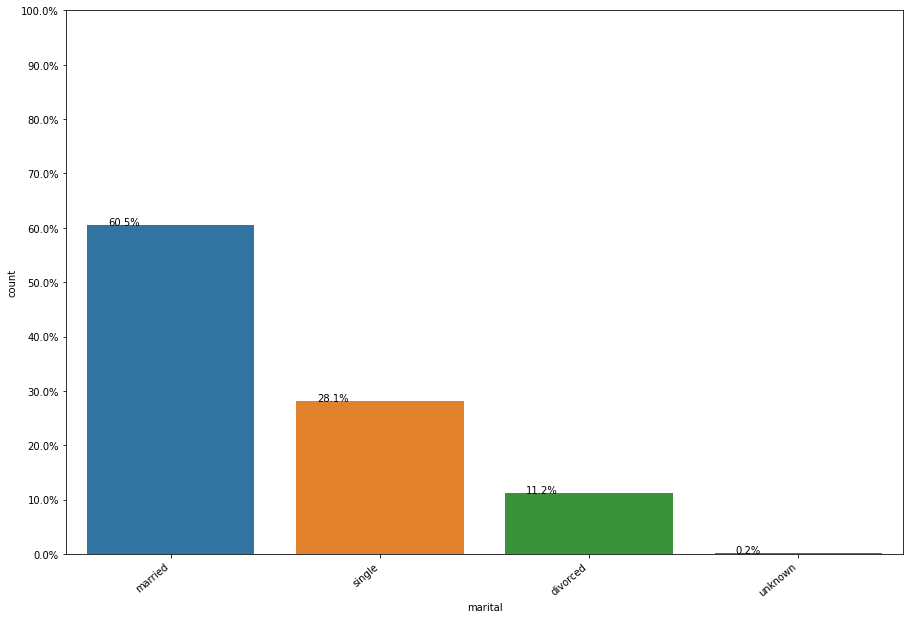

In [37]:
countplot("marital", data)

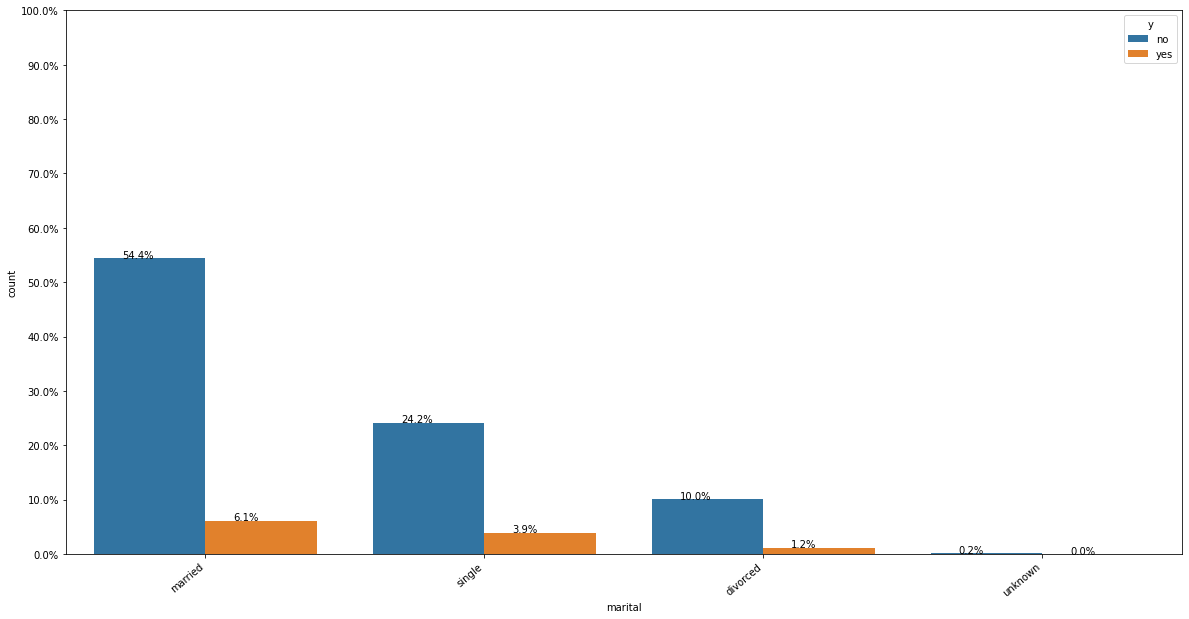

In [38]:
countplot_withY("marital", data)

Majority of the customers are married. Followed by Single, divorced and unknown.

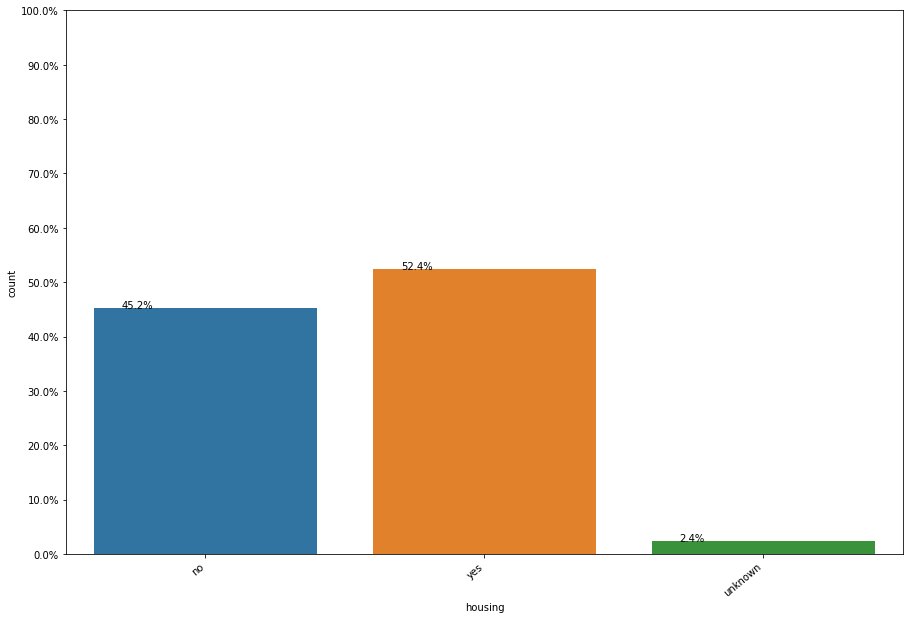

In [39]:
countplot("housing", data)

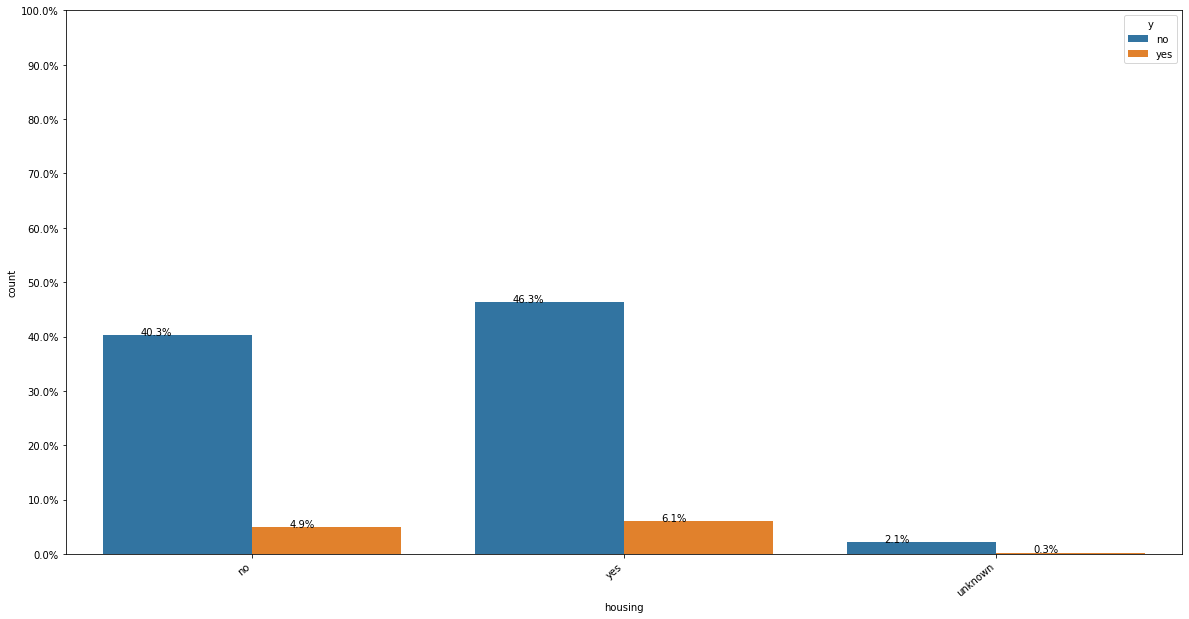

In [40]:
countplot_withY("housing", data)

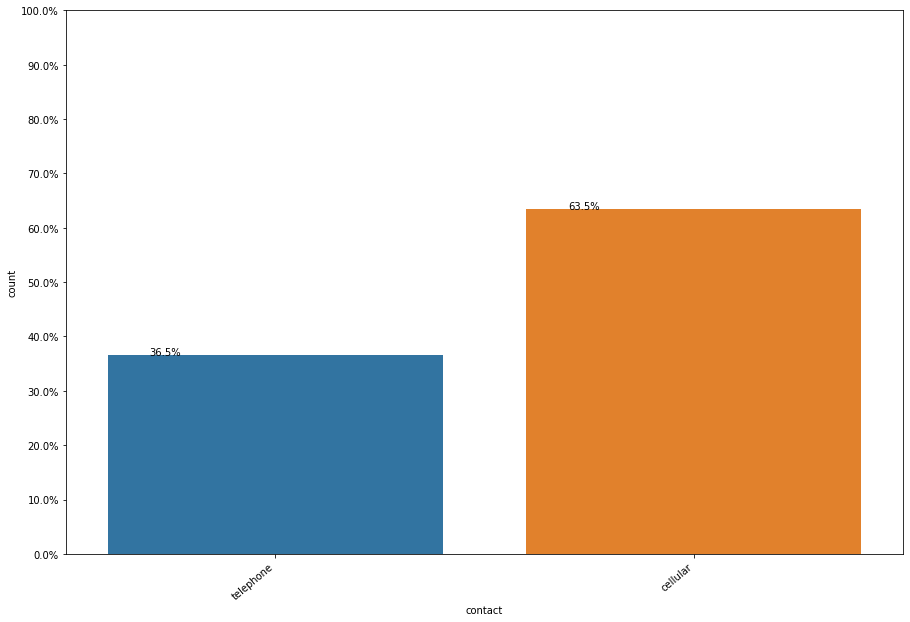

In [41]:
countplot("contact", data)

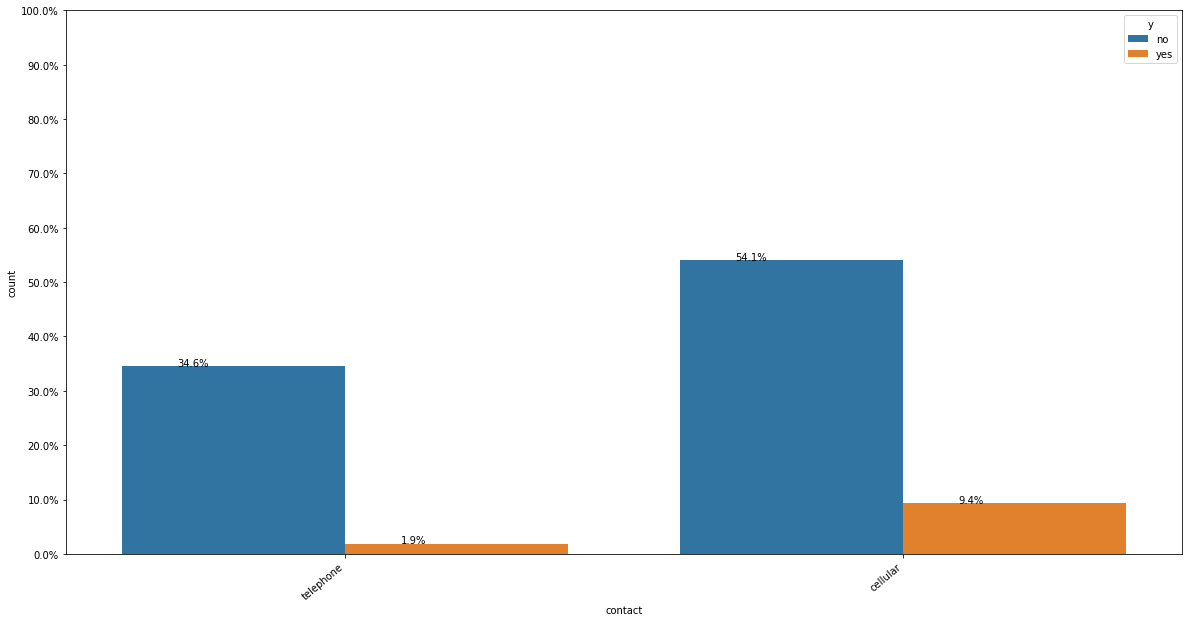

In [42]:
countplot_withY("contact", data)

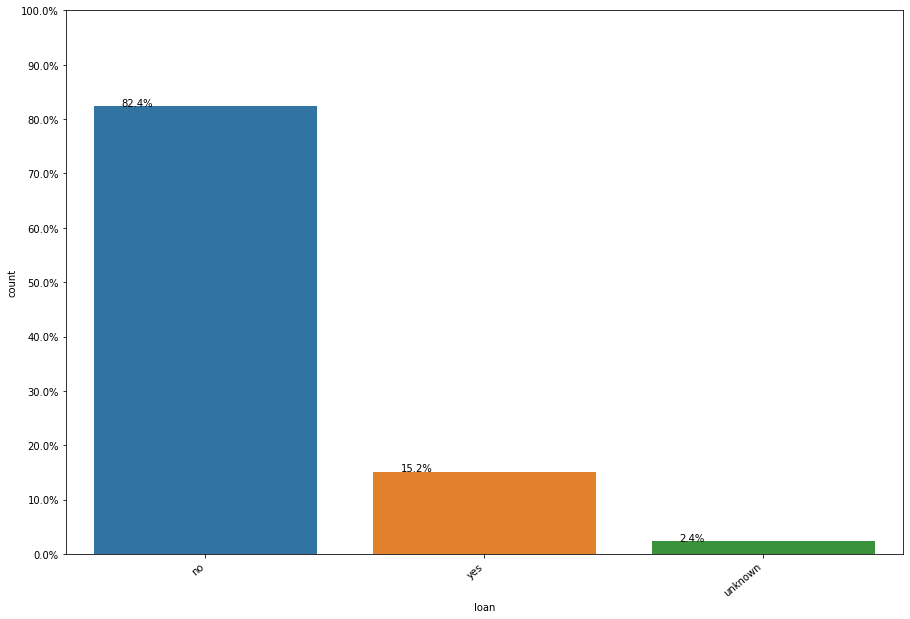

In [43]:
countplot("loan", data)

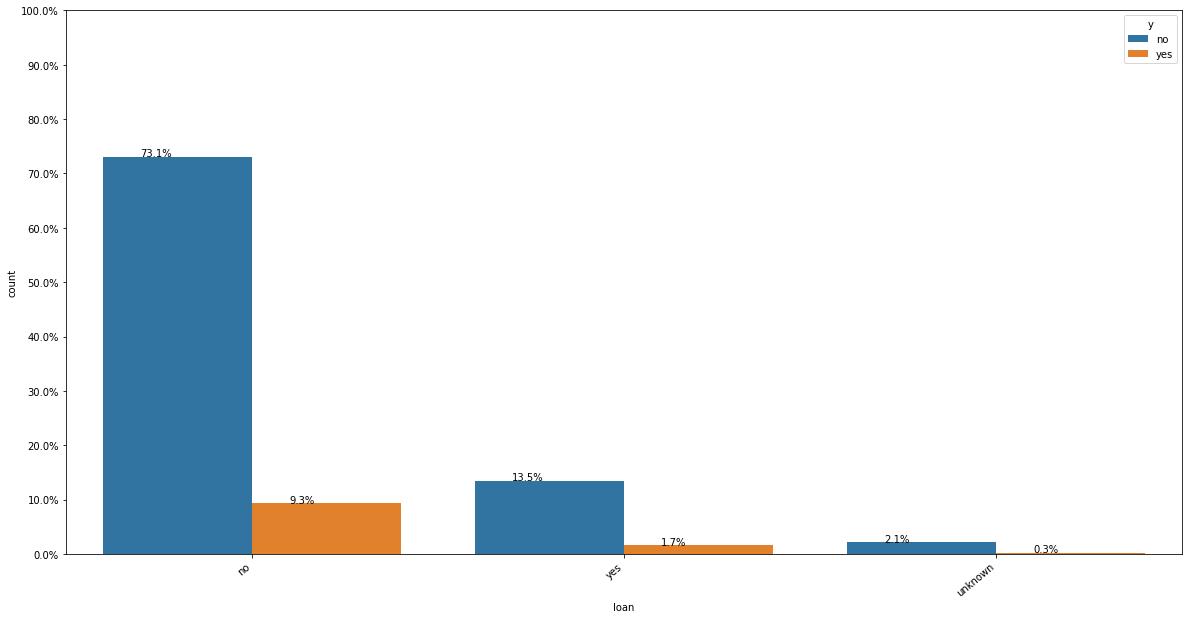

In [44]:
countplot_withY("loan", data)

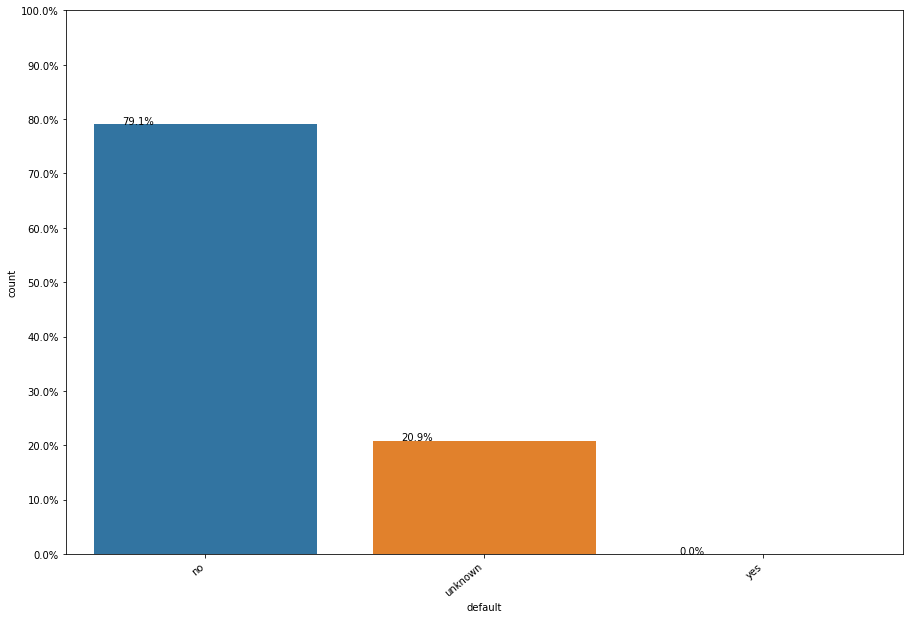

In [45]:
countplot("default", data)

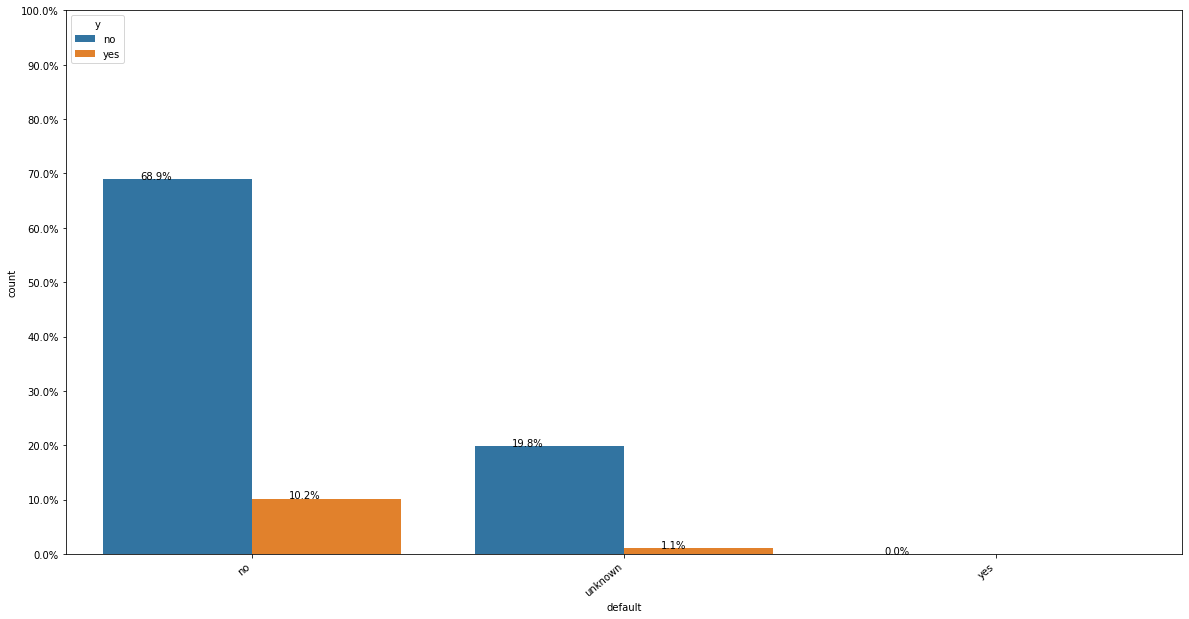

In [46]:
countplot_withY("default", data)

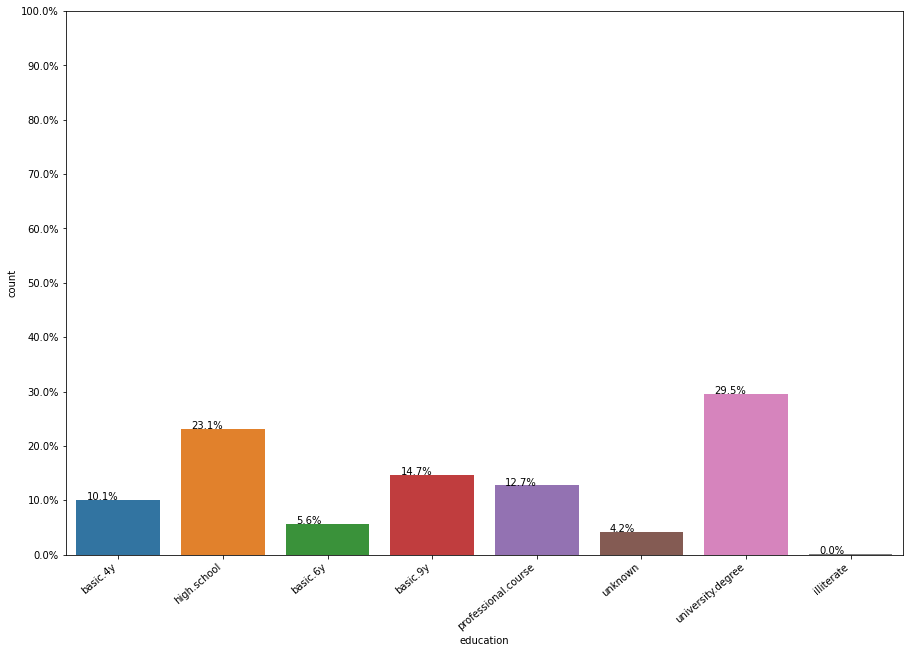

In [47]:
countplot("education", data)

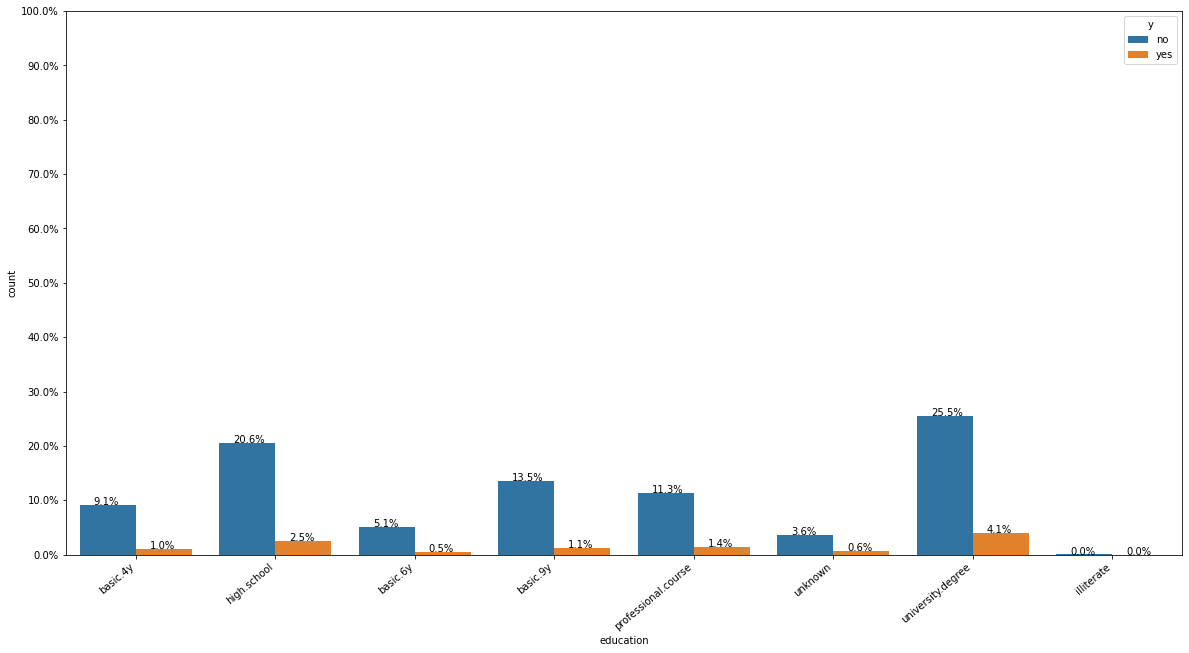

In [48]:
countplot_withY("education", data)

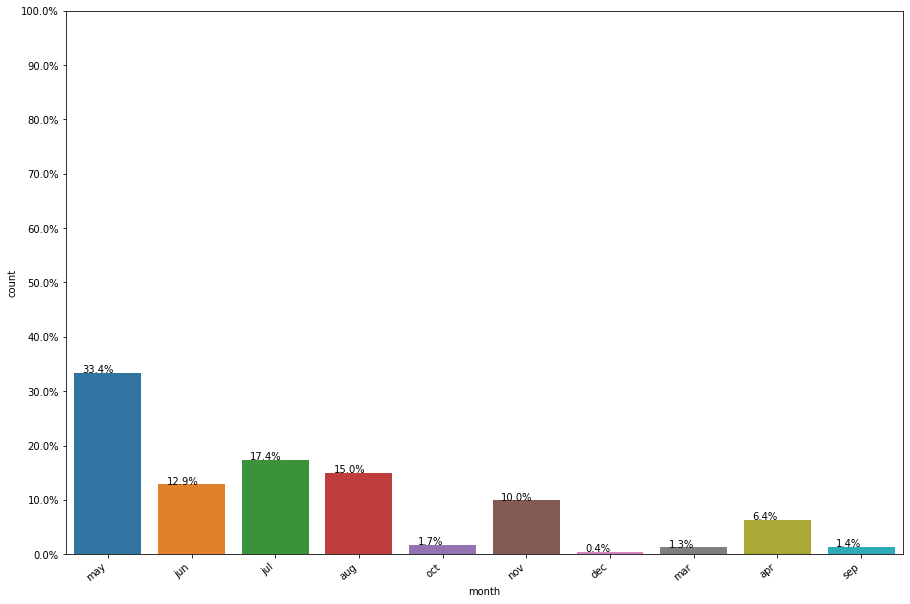

In [49]:
countplot("month", data)


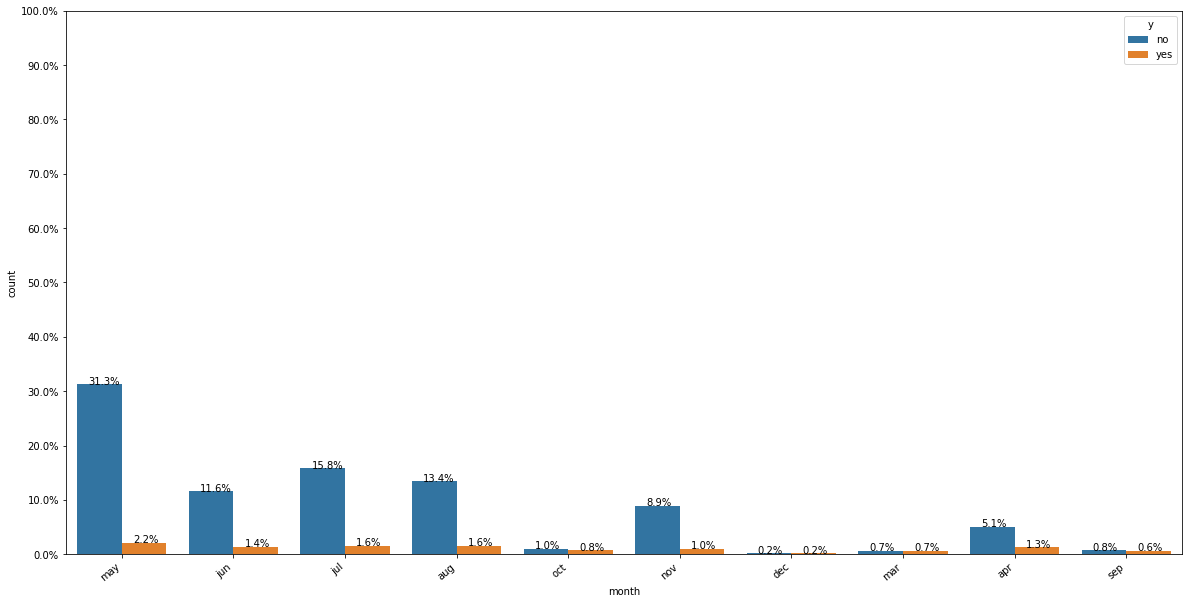

In [50]:
countplot_withY("month", data)

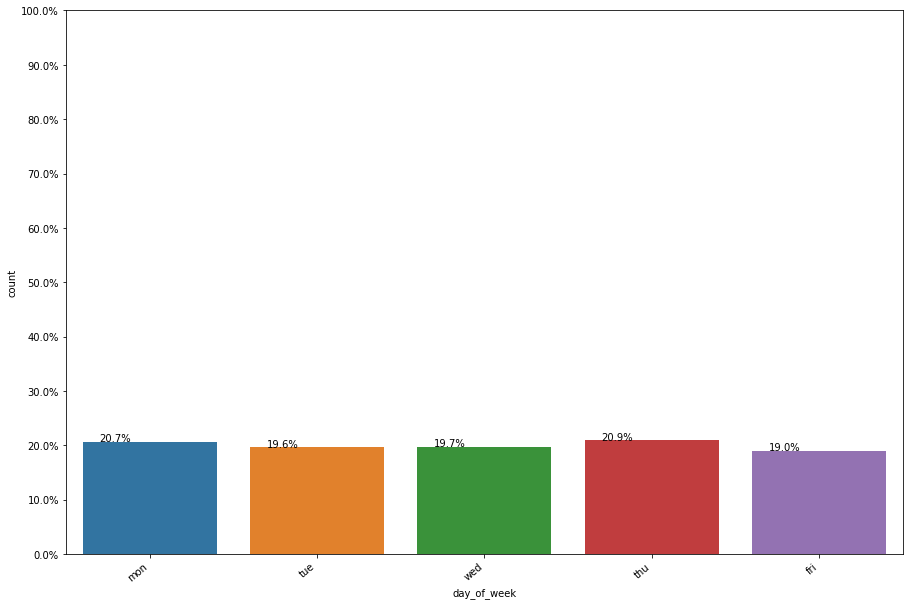

In [51]:
countplot("day_of_week", data)


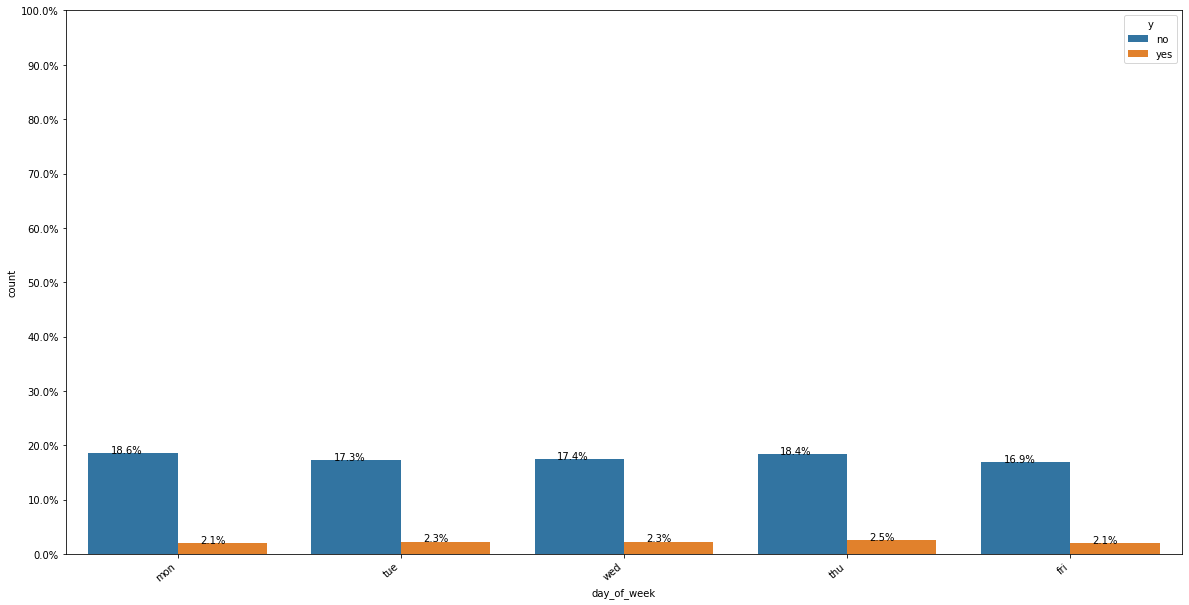

In [52]:
countplot_withY("day_of_week", data)

Now we can plot the distributin of each feature all in one

In [ ]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            try:
                g = sns.distplot(dataset[column])
                plt.xticks(rotation=25)
            except RuntimeError as re:
                if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                    sns.distplot(dataset[column], kde_kws={'bw': 0.1})
                else:
                    raise re
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [53]:
#Change 'day' from words to numbers for easier analysis
#"mon","tue","wed","thu","fri"
lst = [data]
for column in lst:
    column.loc[column["day_of_week"] == "mon", "day_int"] = 1
    column.loc[column["day_of_week"] == "tue", "day_int"] = 2
    column.loc[column["day_of_week"] == "wed", "day_int"] = 3
    column.loc[column["day_of_week"] == "thu", "day_int"] = 4
    column.loc[column["day_of_week"] == "fri", "day_int"] = 5
    

In [63]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [64]:
count_age_y = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_y = count_age_y.transpose()

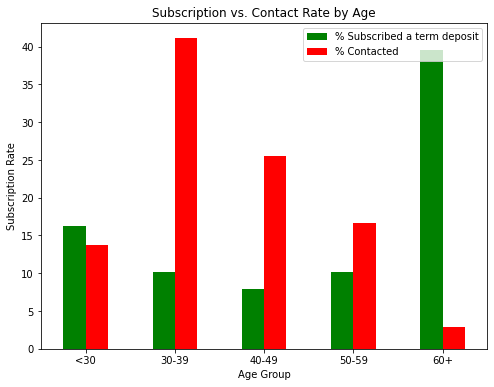

In [66]:
age = pd.DataFrame(data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscribed a term deposit'] = count_age_y['yes']
age.drop('age_group',axis = 1,inplace = True)
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscribed a term deposit','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

This graph indicates that the bank was focused on the 30s aged group(red bar), but this group has lower subscription rates(green bar) compared to the others aged groups.The bank was more effective with 20s and 60s aged group, which should be the next target. Considering that the term deposits are the most liquid and the most secure investment, the pattern is expected.The oldest aged group want to have cash and youngest do not have experience, knowledge and enough money for better and more sophisticated investments. On other hand, the 30s aged group have more loans and less money for savings.

In [67]:
lst = [data]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

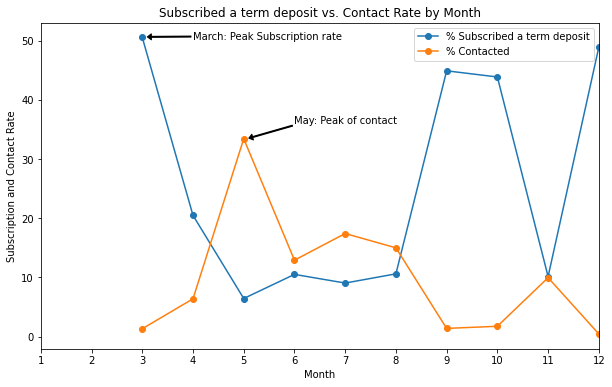

In [68]:
count_month_y = pd.crosstab(data['y'],data['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_y = count_month_y.transpose()

month = pd.DataFrame(data['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscribed a term deposit'] = count_month_y['yes']
month.drop('month_int',axis = 1,inplace = True)
month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)


plot_month = month[['% Subscribed a term deposit','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')
plt.title('Subscribed a term deposit vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
# Annotation: peak of subscription rate
y = month['% Subscribed a term deposit'].max()
x = month['% Subscribed a term deposit'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
plt.show()

The graphic above shows the bank’s contact rate and clients’ response rate in each month in each month.The trends of the lines have diffrent directions. This can be interpret on two ways. Either the bank starts to contact the clients when the demand of deposits starts to decrease or that the bank has bad timing for contacting. The contact rate is the highest in may and august and on other hand, the highest subscription rate occured in march, september and october.


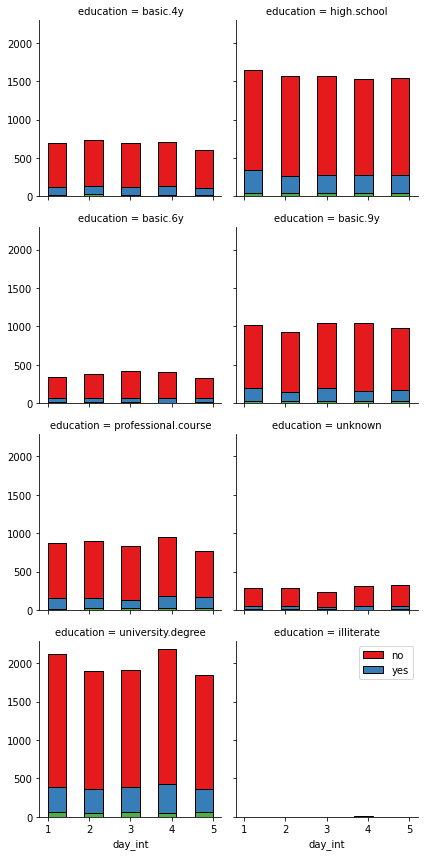

In [54]:

bins = np.linspace(data.day_int.min(), data.day_int.max(), 10)
g = sns.FacetGrid(data, col="education", hue="loan", palette="Set1", col_wrap=2)
g.map(plt.hist, 'day_int', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### Correlation matrix of numerical features

In [60]:
def drawheatmap(df):
    matrix = data.corr()
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu', ax=ax, annot=True, linewidth=0.1)

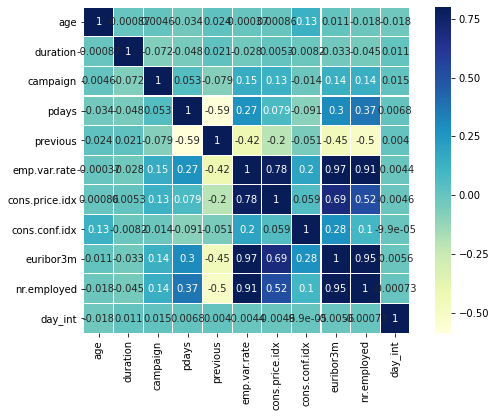

In [62]:
drawheatmap(data)

In corr matrix we add one categoric value to be as numerci, day_of_week as day_int so we can see that there is no correlation between categoric and numeric values as we expected to be.

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.